In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

!pip install folium 

In [155]:
df_2023 = pd.read_csv(r'C:\Users\Reet\Downloads\dataset\Time_series\Airbnb\dataset\AB_US_2023.csv')

C:\Users\Reet\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [156]:
df_2023.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,city
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,NaN,Western Addition,37.77028,-122.43317,Entire home/apt,202,2,383,2023-02-19,2.31,1,128,59,San Francisco
1,5858,Creative Sanctuary,8904,Philip And Tania,NaN,Bernal Heights,37.74474,-122.42089,Entire home/apt,235,30,111,2017-08-06,0.66,1,365,0,San Francisco
2,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,21994,Aaron,NaN,Haight Ashbury,37.76555,-122.45213,Private room,56,32,9,2022-10-27,0.09,13,365,1,San Francisco
3,8339,Historic Alamo Square Victorian,24215,Rosy,NaN,Western Addition,37.77564,-122.43642,Entire home/apt,575,9,28,2019-06-28,0.17,2,365,0,San Francisco
4,8739,"Mission Sunshine, with Private Bath",7149,Ivan & Wendy,NaN,Mission,37.76030,-122.42197,Private room,110,1,770,2023-02-25,4.65,2,159,34,San Francisco


<AxesSubplot:>

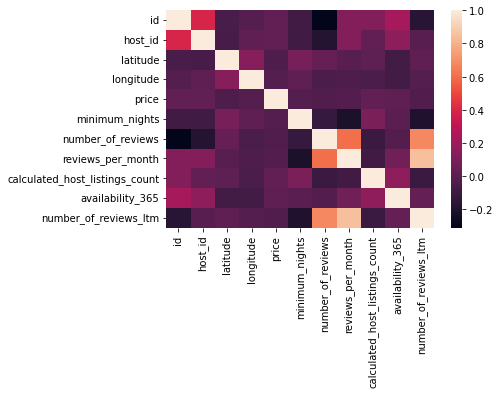

In [157]:
sns.heatmap(df_2023.corr())

In [158]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics 

#df_2023 = df_2023.dropna()
#df_2023.head()

df_2023 = df_2023.drop(['neighbourhood_group'], axis=1)

In [159]:
df_2023['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [160]:
df_2023['city'].unique()

array(['San Francisco', 'Washington D.C.', 'Oakland', 'Jersey City',
       'New Orleans', 'Los Angeles', 'New York City', 'Cambridge',
       'Santa Clara County', 'Asheville', 'Salem', 'Columbus',
       'Rhode Island', 'San Diego', 'Nashville', 'Santa Cruz County',
       'Denver', 'Chicago', 'Austin', 'Pacific Grove', 'Portland',
       'Seattle', 'Twin Cities MSA', 'Broward County', 'Clark County',
       'Boston', 'San Mateo County'], dtype=object)

In [161]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

df_2023['room_type'] = df_2023['room_type'].map({'Private room':0, 'Entire home/apt':1, 'Shared room':2, 'Hotel room':3})
df_2023['city'] = df_2023['city'].map({'Los Angeles':0, 'New York City':1, 
                                       'Rhode Island':2, 'Seattle':3, 'San Francisco':4,'Washington D.C.':5,
                                      'Oakland':6,'Jersey City':7,'New Orleans':8,'Cambridge':9,'Santa Clara County':10,
                                      'Asheville':11,'Salem':12,'Columbus':13,'Rhode Island':14, 'San Diego':15,
                                      'Nashville':16, 'Santa Cruz County':17, 'Denver':18, 'Chicago':19, 'Austin':20,'Pacific Grove':21,
                                      'Portland':22,'Seattle':23,'Twin Cities MSA':24, 'Broward County':25,'Clark County':26,
                                      'Boston':27, 'San Mateo County':28})

X = df_2023[['room_type', 'city', 'minimum_nights','number_of_reviews','availability_365']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

             feature       VIF
0          room_type  2.532677
1               city  2.082201
2     minimum_nights  1.174709
3  number_of_reviews  1.234102
4   availability_365  2.189477


In [162]:
x1 = df_2023[['room_type', 'availability_365','city','number_of_reviews', 'minimum_nights','number_of_reviews']]
x1 = x1.values
y1 = df_2023[['price']]
y1 = y1.values

In [163]:
df_2023.isna()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,city
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232142,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False
232143,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False
232144,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False
232145,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False


In [164]:
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.25, random_state=1) 
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
print("Intercept: ", regr.intercept_)
print("Coefficients:")
list(zip(X, regr.coef_))
y_pred= regr.predict(X_test)
print("Prediction for test set: {}".format(y_pred))

from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('R squared: {:.2f}'.format(regr.score(x1,y1)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Intercept:  [200.01792028]
Coefficients:
Prediction for test set: [[197.90937315]
 [317.27332949]
 [230.54757544]
 ...
 [245.53695639]
 [220.82982739]
 [340.4591245 ]]
R squared: 0.39
Mean Absolute Error: 196.00656560465703
Mean Square Error: 1014125.5005090048
Root Mean Square Error: 1007.0379836475905


In [165]:
### Improving score with k fold corss validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
lm = linear_model.LinearRegression()
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=5)
print(scores)

folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=folds)
print(scores)

[0.00752569 0.00425342 0.00278103 0.00325879 0.00416101]
[0.0040336  0.00548386 0.00331704 0.00369295 0.00357323]


In [166]:
airbnb=df_2023[["latitude","longitude","price"]]
min_price=df_2023["price"].min()
max_price=df_2023["price"].max()
df_2023["price"].describe().to_frame()

,price
count,232147.000000
mean,259.468001
std,1024.645918
min,0.000000
25%,91.000000
50%,149.000000
75%,250.000000
max,100000.000000


In [108]:
print(df_2023['latitude'].mean())
print(df_2023['longitude'].mean())

38.44472578795986
-96.14007521083512


In [150]:
# from folium import plugins
# m = folium.Map([38.444 ,-96.1400], zoom_start=5,width="%100",height="%100")
# locations = list(zip(df_2023.latitude, df_2023.longitude))
# cluster = plugins.MarkerCluster(locations=locations,                     
#                popups=df_2023["neighbourhood"].tolist())  
# m.add_child(cluster)
# m


In [149]:
# m = folium.Map(location=[38.444 ,-96.1400],width="%100",height="%100")
# for i in range(len(locations)):
#     folium.CircleMarker(location=locations[i],radius=1).add_to(m)
# m


In [167]:
# import branca.colormap as cm
# m = folium.Map(location=[38.444 ,-96.1400],width="%100",height="%100")
# colormap = cm.StepColormap(colors=['green','yellow','orange','red'] ,#renkler
#                            index=[min_price,85,134,218,max_price], #eşik değerler
#                            vmin= min_price,
#                            vmax=max_price)

# for loc, p in zip(zip(df_2023["latitude"],df_2023["longitude"]),df_2023["price"]):
#       folium.Circle(
#       location=loc,
#       radius=2, #yarıçap
#       fill=True, 
#       color=colormap(p)
# ).add_to(m)
# m

